# Data Mining Topic Dimensionality Reduction with PCA, LDA, and t-SNE

Introduction:

In this Jupyter Notebook, we embark on an exciting journey into the realm of dimensionality reduction, a critical aspect of data mining that allows us to distill complex information into a more manageable form. Our focus lies on three powerful techniques: Principal Component Analysis (PCA), Linear Discriminant Analysis (LDA), and t-Distributed Stochastic Neighbor Embedding (t-SNE).

Objective:
The primary objective of this analysis is to illustrate the efficacy of various dimensionality reduction methods in uncovering the latent structures within our dataset. By reducing the number of features while retaining essential information, we aim to enhance interpretability, facilitate visualization, and potentially improve the performance of downstream machine learning models.

Methods:

Principal Component Analysis (PCA): We commence our exploration with PCA, a technique that identifies the principal components of the data, enabling us to capture the maximum variance in fewer dimensions. This not only simplifies the dataset but also aids in retaining crucial information.

Linear Discriminant Analysis (LDA): Next, we delve into LDA, a supervised method that not only reduces dimensionality but also emphasizes the separability between different classes, making it particularly useful in classification tasks.

t-Distributed Stochastic Neighbor Embedding (t-SNE): Finally, we unravel the mysteries of t-SNE, a non-linear dimensionality reduction technique that excels in preserving local structures, providing a compelling approach for visualizing high-dimensional data.

Model Explanation:

PCA Model: The PCA model identifies orthogonal axes (principal components) along which the data varies the most. We visualize the transformed data in a reduced-dimensional space, where each component represents a direction capturing variance.

LDA Model: LDA seeks to maximize the distance between class means while minimizing the spread within each class. It transforms the data into a lower-dimensional space, optimizing for class separability.

t-SNE Model: t-SNE focuses on maintaining pairwise similarities between data points in the original and reduced-dimensional spaces. It is particularly effective in revealing clusters and preserving local structures.



In [3]:
import pandas as pd                                                   # For dataframes
import numpy as np                                                    # For various functions
import matplotlib.pyplot as plt                                       # For plotting functions
import seaborn as sns                                                 # For additional plotting functions
from sklearn.model_selection import train_test_split                  # For train/test splits
from sklearn.decomposition import PCA                                 # PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # For LDA
from sklearn.manifold import TSNE                                     # TSNE

# LOAD AND PREPARE DATA
Many of the datasets for this course come from the Machine Learning Repository at the University of California, Irvine (UCI) at [https://archive.ics.uci.edu/](https://archive.ics.uci.edu/).

For all three demonstrations of dimensionality reduction, we'll use the "Optical Recognition of Handwritten Digits Data Set," which can be accessed via [https://j.mp/34NFNGn](https://j.mp/34NFNGn). We'll use the dataset saved in "optdigits.tra," which is the training dataset.

## Import Data

- To read read the dataset from a local CSV file, run the following cell. (This is the recommended approach.)

In [4]:
df = pd.read_csv('/content/optdigits_raw.csv')

- Alternatively, to read the data from the UCI ML Repository, uncomment the lines in the cell below and run them.

In [5]:
# df = pd.read_csv(
#     'https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra',
#     header=None)

- Check the data.

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


## Rename Variables

- Sequentially renames all attribute columns (i.e., pixel data) as `P0`, `P2`, etc.
- Renames the class variable as `y`.

In [7]:
df.columns = ["P" + str(i) for i in range(0, len(df.columns) - 1)] + ["y"]

In [8]:
df.head()

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P55,P56,P57,P58,P59,P60,P61,P62,P63,y
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


## Select Cases

- Select cases for the digits {1, 2, 3}.
- Look at the first 5 rows.

In [9]:
df = df.loc[df.y.isin([1, 3, 6])]

df.head()

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P55,P56,P57,P58,P59,P60,P61,P62,P63,y
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6
11,0,0,0,3,16,11,1,0,0,0,...,0,0,0,0,2,14,14,1,0,1
14,0,0,7,11,11,6,0,0,0,9,...,0,0,0,14,16,12,10,1,0,3
24,0,0,9,13,1,0,0,0,0,0,...,5,0,0,4,15,16,16,16,16,1
27,0,0,0,10,12,0,0,0,0,0,...,0,0,0,1,11,14,12,1,0,6


## Split Data

- `train_test_split()` splits the data into training and testing sets.
- Specify the data matrix `X`, which contrains the attributes of the pixel data.
- Extract columns `P0`, `P2`, ..., `P63` with `df.filter(regex='\d')`, which will keep only names with a numeric digits in them.
- Specify the target variable as `df.y`.
- Create the `trn` and `tst` dataframes.

In [10]:
# Renames columns
X_trn, X_tst, y_trn, y_tst = train_test_split(
    df.filter(regex='\d'),
    df.y,
    test_size=0.30,
    random_state=1)

# Creates the training dataset, trn
trn = X_trn
trn["y"] = y_trn

# Creates the testing dataset, tst
tst = X_tst
tst["y"] = y_tst

# EXPLORE TRAINING DATA

## Display Images
Display the images of the first 20 digits of `X_train`.

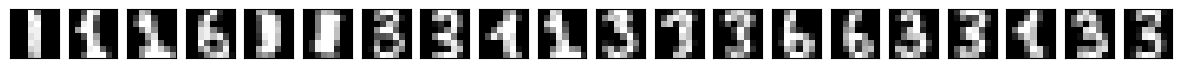

In [11]:
# Sets up a grid for the images
fig, ax = plt.subplots(
    nrows=1,
    ncols=20,
    figsize=(15, 3.5),
    subplot_kw=dict(xticks=[], yticks=[]))

# Plots 20 digits
for i in np.arange(20):
    ax[i].imshow(X_trn.to_numpy()[i, 0:-1].reshape(8, 8), cmap=plt.cm.gray)
plt.show()

## Explore Attribute Variables
Select four arbitrary features (any four will do) and get paired plots.

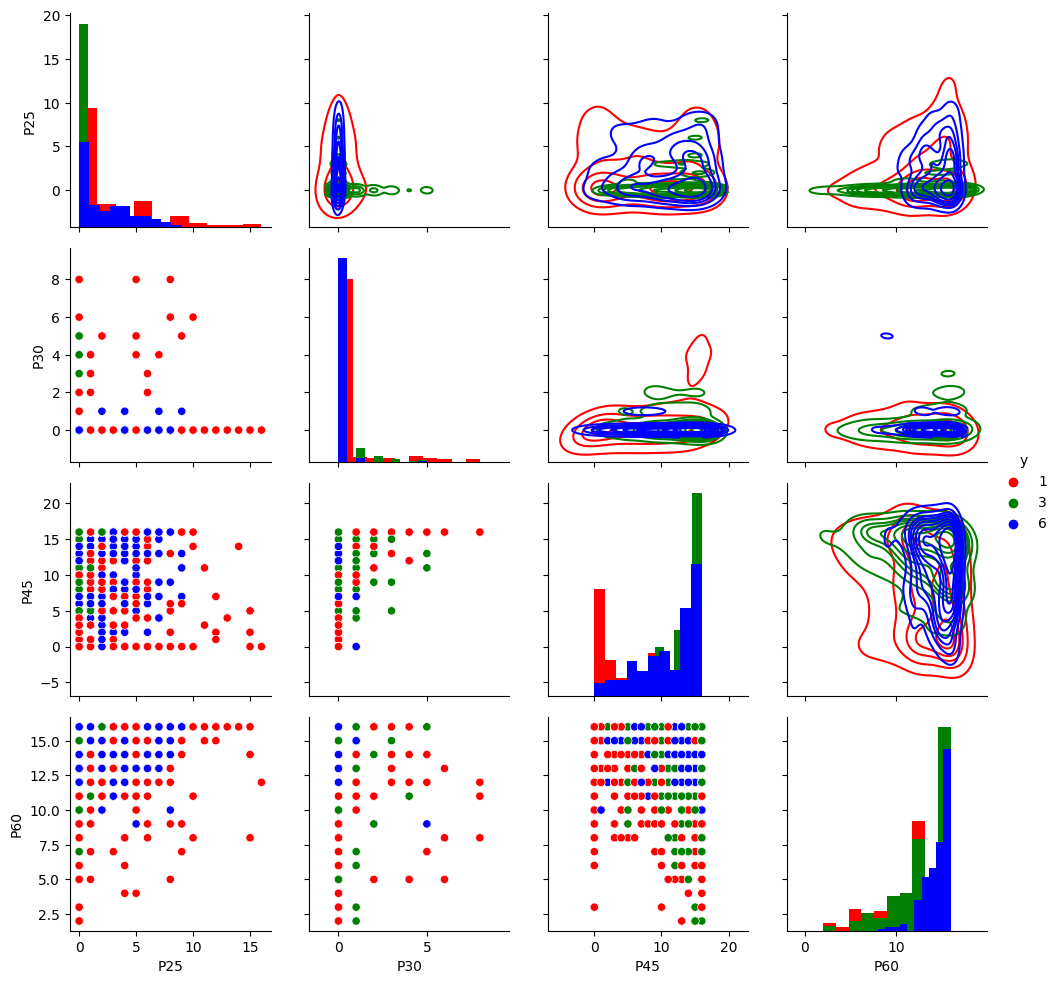

In [12]:
# Creates a grid using Seaborn's PairGrid()
g = sns.PairGrid(
    trn,
    vars=["P25", "P30", "P45", "P60"],
    hue="y",
    diag_sharey=False,
    palette=["red", "green", "blue"])

# Adds histograms on the diagonal
g.map_diag(plt.hist)

# Adds density plots above the diagonal
g.map_upper(sns.kdeplot)

# Adds scatterplots below the diagonal
g.map_lower(sns.scatterplot)

# Adds a legend
g.add_legend()

# SAVE DATA
Save `df`, `trn`, and `tst` to CSV files to be used later.

# CLEAN UP

- If desired, clear the results with Cell > All Output > Clear.
- Save your work by selecting File > Save and Checkpoint.
- Shut down the Python kernel and close the file by selecting File > Close and Halt.

# PCA: PRINCIPAL COMPONENT ANALYSIS
### TRAIN MODEL

In the training phase, we'll do the following:

1. Set up the PCA object
1. Project the training data onto the principal directions found by PCA
1. Plot the ratio of variances explained by each direction
1. Create a scatter plot of projected training data along the first two principal directions
1. Get the average log-likelihood score of all samples

In [13]:
# Imports the training data
trn = pd.read_csv('/content/optdigits_trn.csv')

# Separates the attributes P0-P63 into X_trn
X_trn = trn.filter(regex='\d')

# Separates the class variable into y_trn
y_trn = trn.y

# Imports the testing data
tst = pd.read_csv('/content/optdigits_tst.csv')

# Separates the attributes P0-P63 into X_tst
X_tst = tst.filter(regex='\d')

# Separates the class variable into y_tst
y_tst = tst.y

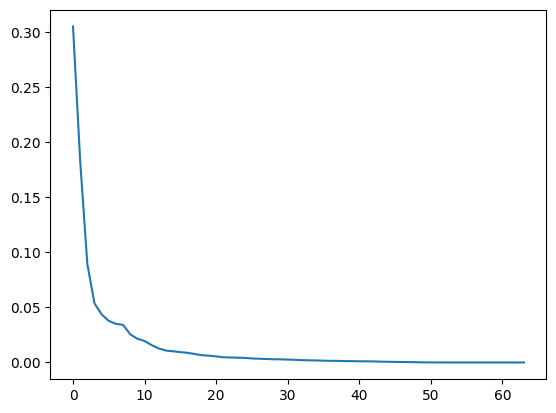

In [14]:
#setup pca object
pca = PCA()
# Transforms the training data ('tf' = 'transformed')
trn_tf = pca.fit_transform(X_trn)

# Plot the variance explained by each component
plt.plot(pca.explained_variance_ratio_)


<Axes: >

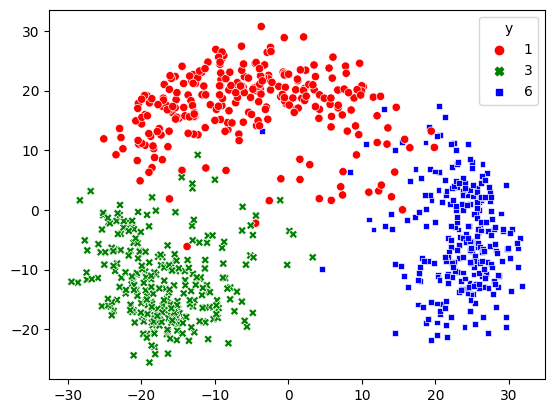

In [15]:
# Plots the projected data set on the first two principal components and colors by class
sns.scatterplot(
    x=trn_tf[:, 0],
    y=trn_tf[:, 1],
    style=y_trn,
    hue=y_trn,
    palette=['red', 'green', 'blue'])

Seperation in 2 dimensional data is very easy as seen in the scatterplot btw 1 3 6

In [16]:
# Gets the average log likelihood score of training data (with two decimal places)
print("%.2f" % pca.score(X_trn))

183.91


# TEST MODEL PCA

This phase takes the PCA model developed above and does the following:

1. Transforms the test data on the learned PCA directions
1. Creates a scatter plot along the first two principal directions
1. Finds the average log likelihood score of all test points

In [17]:
# Transforms the test data
tst_tf = pca.transform(X_tst)

<Axes: >

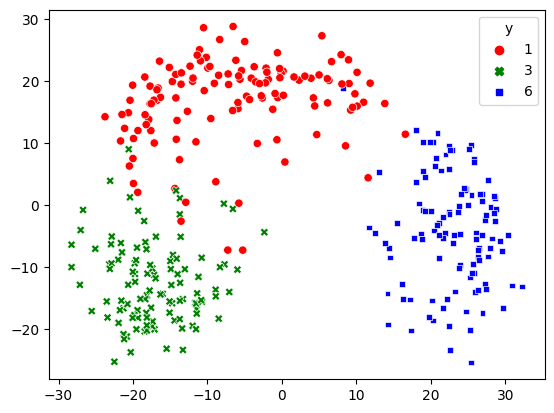

In [18]:
# Make a scatter plot along the first two principal directions
# You can see how well the digits are separated on the test set
sns.scatterplot(
    x=tst_tf[:, 0],
    y=tst_tf[:, 1],
    style=y_tst,
    hue=y_tst,
    palette=['red', 'green', 'blue'])

In [19]:
# Gets the average log likelihood score of testing data to compare with the
# training data (again with two decimal places)
print("%.2f" % pca.score(X_tst))

179.70


# LINEAR DISCRIMINANT ANALYSIS:

TRAIN MODEL

In the training phase, we'll do the following:

1. Set up an LDA object as lda using `LinearDiscriminantAnalysis()`.
1. Fit the model to the training data `trn`.
1. Transform the data using `lda`.
1. Plot the transformed data.
1. Find the mean accuracy on the training data.

In [20]:
# Sets up the LinearDiscriminantAnalysis object
lda = LinearDiscriminantAnalysis()

# Fits the training data
lda.fit(X_trn, y_trn)

# Transforms training data
trn_tf = lda.transform(X_trn)

In [21]:
# Transforms training data
trn_tf = lda.transform(X_trn)

Accuracy on training data = 99.63%


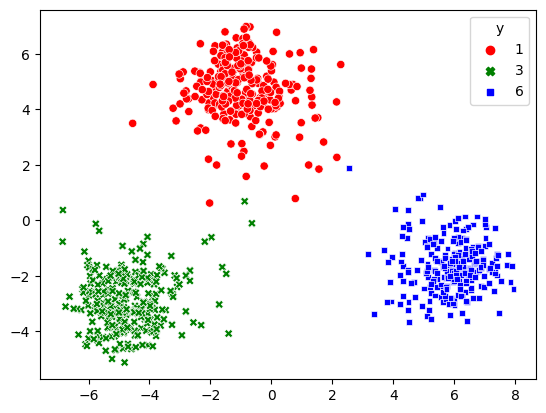

In [22]:
# Plots the projected data set on the first two discriminant functions and colors by class
sns.scatterplot(
    x=trn_tf[:, 0],
    y=trn_tf[:, 1],
    style=y_trn,
    hue=y_trn,
    palette=['red', 'green', 'blue'])



print('Accuracy on training data = '
    + str("{:.2%}".format(lda.score(X_trn, y_trn))))

# TEST MODEL LDA

Accuracy on testing data = 99.71%


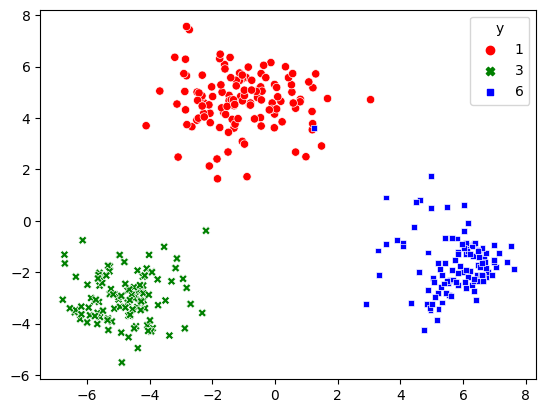

In [23]:
# Uses the trained model to transform the test data
tst_tf = lda.transform(X_tst)

# Plots the projected data set on the first two discriminant functions and colors by class
sns.scatterplot(
    x=tst_tf[:, 0],
    y=tst_tf[:, 1],
    style=y_tst,
    hue=y_tst,
    palette=['red', 'green', 'blue'])

print('Accuracy on testing data = '
    + str("{:.2%}".format(lda.score(X_tst, y_tst))))

# t-SNE: t-DISTRIBUTED STOCHASTIC NEIGHBOR EMBEDDING

In [24]:
# Imports the complete dataset
df = pd.read_csv('/content/optdigits.csv')

# Separates the attributes P0-P63 into X
X = df.filter(regex='\d')

# Separates the class variable into y
y = df.y

In [25]:
# Sets up the t-SNE object with 2 components
tsne = TSNE(
    n_components=2,
    random_state=1)

# Displays the t-SNE parameters
tsne.get_params()

{'angle': 0.5,
 'early_exaggeration': 12.0,
 'init': 'pca',
 'learning_rate': 'auto',
 'method': 'barnes_hut',
 'metric': 'euclidean',
 'metric_params': None,
 'min_grad_norm': 1e-07,
 'n_components': 2,
 'n_iter': 1000,
 'n_iter_without_progress': 300,
 'n_jobs': None,
 'perplexity': 30.0,
 'random_state': 1,
 'square_distances': 'deprecated',
 'verbose': 0}

<Axes: >

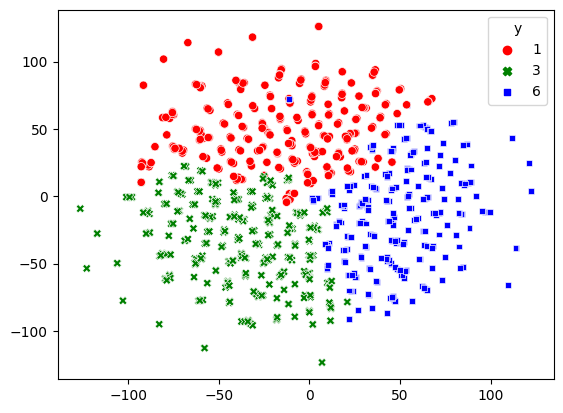

In [26]:
# Sets up t-SNE with perplexity = 1
tsne = TSNE(
    n_components=2,
    perplexity=1,
    random_state=1)

# Transforms the attribute data
X_tf = tsne.fit_transform(X)

# Creates a scatterplot of the data embedding
sns.scatterplot(
    x=X_tf[:, 0],
    y=X_tf[:, 1],
    style=y,
    hue=y,
    palette=['red', 'green', 'blue'])

<Axes: >

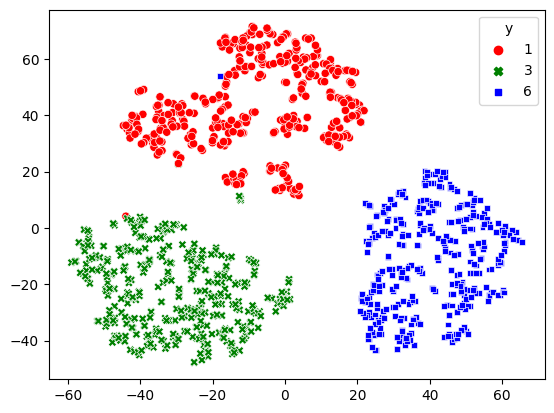

In [27]:
# Sets up t-SNE with perplexity = 10
tsne = TSNE(
    n_components=2,
    perplexity=10,
    random_state=1)

# Transforms the attribute data
X_tf = tsne.fit_transform(X)

# Creates a scatterplot of the data embedding
sns.scatterplot(
    x=X_tf[:, 0],
    y=X_tf[:, 1],
    style=y,
    hue=y,
    palette=['red', 'green', 'blue'])

<Axes: >

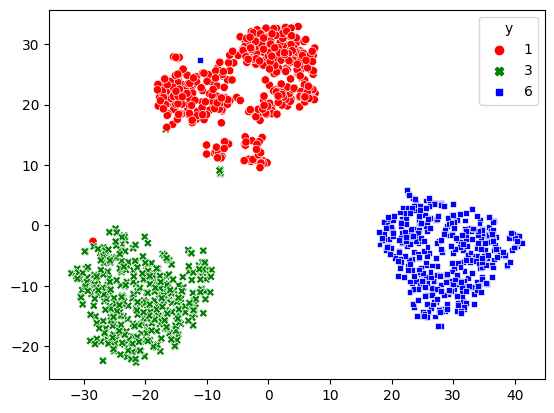

In [28]:
# Sets up t-SNE with perplexity = 50
tsne = TSNE(
    n_components=2,
    perplexity=50,
    random_state=1)

# Transforms the attribute data
X_tf = tsne.fit_transform(X)

# Creates a scatterplot of the data embedding
sns.scatterplot(
    x=X_tf[:, 0],
    y=X_tf[:, 1],
    style=y,
    hue=y,
    palette=['red', 'green', 'blue'])